/tmp/ipykernel_2179875/3619954606.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(directory_paths))  # Get a colormap with distinct colors for each directory path


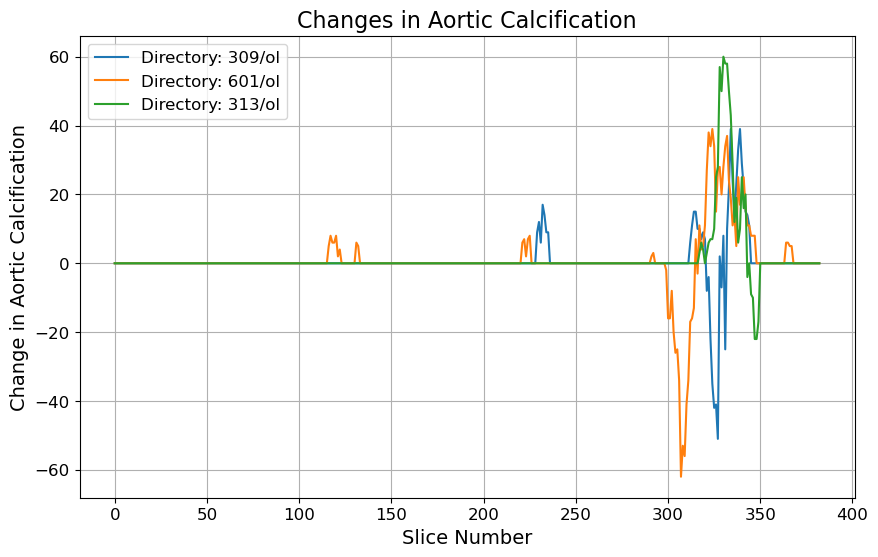

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import os
import glob
from natsort import natsorted
import matplotlib.cm as cm  # Import colormap module

# List of directory paths
directory_paths = [
    '309/ol',
    '601/ol',
    '313/ol',
    # Add or modify other directory paths here
]

fig, ax = plt.subplots(figsize=(10, 6))  # Create a single figure
cmap = cm.get_cmap('tab10', len(directory_paths))  # Get a colormap with distinct colors for each directory path
legend_labels = []  # List to store legend labels

for idx, directory_path in enumerate(directory_paths):
    tif_file_paths = glob.glob(os.path.join(directory_path, '*.tif'))
    tif_file_paths = natsorted(tif_file_paths)

    # Initialize an empty list to store the sum of non-zero pixels for each file
    all_sum_per_slice = []

    # Loop through each .tiff file
    for tif_file_path in tif_file_paths:
        # Load the current .tiff file
        tiff_data = tf.imread(tif_file_path)

        # Initialize an empty list to store the sum of non-zero pixels per slice
        sum_per_slice = []

        # Loop through each image slice
        for slice_data in tiff_data:
            # Calculate the sum of non-zero pixels for the current slice
            non_zero_sum = np.sum(slice_data > 0)
            sum_per_slice.append(non_zero_sum)

        # Append the sums for the current file to the overall list
        all_sum_per_slice.append(sum_per_slice)

    # Calculate the change in aortic calcification for each file
    changes = []
    for i in range(len(all_sum_per_slice) - 1):
        first_plot = all_sum_per_slice[i]
        last_plot = all_sum_per_slice[i + 1]
        change = [last - first for first, last in zip(first_plot, last_plot)]
        changes.append(change)

    # Plot the changes in aortic calcification
    for i, change in enumerate(changes):
        label = f"{os.path.basename(tif_file_paths[i])} to {os.path.basename(tif_file_paths[i + 1])}"
        line, = ax.plot(change, label=label)#, color=cmap(idx))

    legend_labels.append(f"Directory: {directory_path}")

# Customize the plot for better visualization
ax.set_title('Changes in Aortic Calcification', fontsize=16)
ax.set_xlabel('Slice Number', fontsize=14)
ax.set_ylabel('Change in Aortic Calcification', fontsize=14)
ax.grid(True)
ax.legend(legend_labels, fontsize=12, loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()